# EDA and Pre-Processing:

Include a clear discussion that ensures all steps are clearly explained and addresses the following:
- How did you make sure that you are ready to apply machine learning models?
- What type of pre-processing is required on your data
- How can you define and refine various feature variables that you may potentially use for
the modeling?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Attributes

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]


## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations

Duplicated: 272 observations

# Load the data

In [3]:
df = pd.read_csv("/home/argha/Dropbox/00_cpt/03_Third_sem/anly_530/project/heart.csv")

In [4]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
866,44,M,ATA,130,219,0,LVH,188,N,0.0,Up,0
648,59,M,ASY,170,326,0,LVH,140,Y,3.4,Down,1
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
520,64,M,ASY,130,223,0,ST,128,N,0.5,Flat,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.shape

(918, 12)

# Summary of the Data:

This dataset contains information related to cardiovascular disease. The dataset has 918 rows. It includes 6 numerical features, and 5 categorical features that are relevant in predicting heart disease. The target variable `HeartDisease` indicates the presence (1) or absence (0) of heart disease.

# Summary Statistics:

- Age: The mean age of the patients in the dataset is 53.5 years, with a standard deviation of 9.4 years. The age ranges from 28 to 77 years, with 25% of patients below 47 years, 50% between 47 and 54 years (median), and 75% below 60 years.

- Resting Blood Pressure (RestingBP): The mean resting blood pressure is 132.4 mm Hg, with a standard deviation of 18.5 mm Hg. The resting blood pressure ranges from 0 to 200 mm Hg, with 25% of patients having a blood pressure below 120 mm Hg, 50% between 120 and 130 mm Hg (median), and 75% below 140 mm Hg.

- Cholesterol: The mean serum cholesterol level is 198.8 mm/dl, with a standard deviation of 109.4 mm/dl. Cholesterol levels range from 0 to 603 mm/dl. Of all data points, 25% of patients have cholesterol levels below 173.3 mm/dl. 50% population sample have between 173.3 and 223 mm/dl (median), and 75% below 267 mm/dl.

- Fasting Blood Sugar (FastingBS): about 76.69% have fasting blood sugar less than or equal to 120 mg/dl and 23.3% of patients have fasting blood sugar greater than 120 mg/dl (coded as 1), while  (coded as 0).

- Maximum Heart Rate Achieved (MaxHR): The mean maximum heart rate achieved is 136.81 beats per minute (bpm), with a standard deviation of 25.46 bpm. The maximum heart rate achieved ranges from 60 to 202 bpm, with 25% of patients achieving a maximum heart rate below 120 bpm, 50% between 120 and 138 bpm (median), and 75% below 156 bpm.

- ST Depression Induced by Exercise (Oldpeak): The mean value of ST depression is 0.89, with a standard deviation of 1.07. The ST depression values range from -2.6 to 6.2, with 25% of patients having an oldpeak value of 0 or less, 50% with a value between 0 and 0.6 (median), and 75% below 1.5.

- Heart Disease (Target Variable): The dataset is relatively balanced with 55.34% of patients diagnosed with heart disease (coded as 1) and 44.66% without heart disease (coded as 0).

This summary provides an overview of the key statistical measures and distributions of the numerical features in the dataset, as well as the class distribution of the target variable 'HeartDisease,' which will be useful for further analysis and modeling to predict heart disease based on these features.

In [7]:
# Summary Statistics
summary_stats = df.describe().T
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


# Data visualization for numerical features

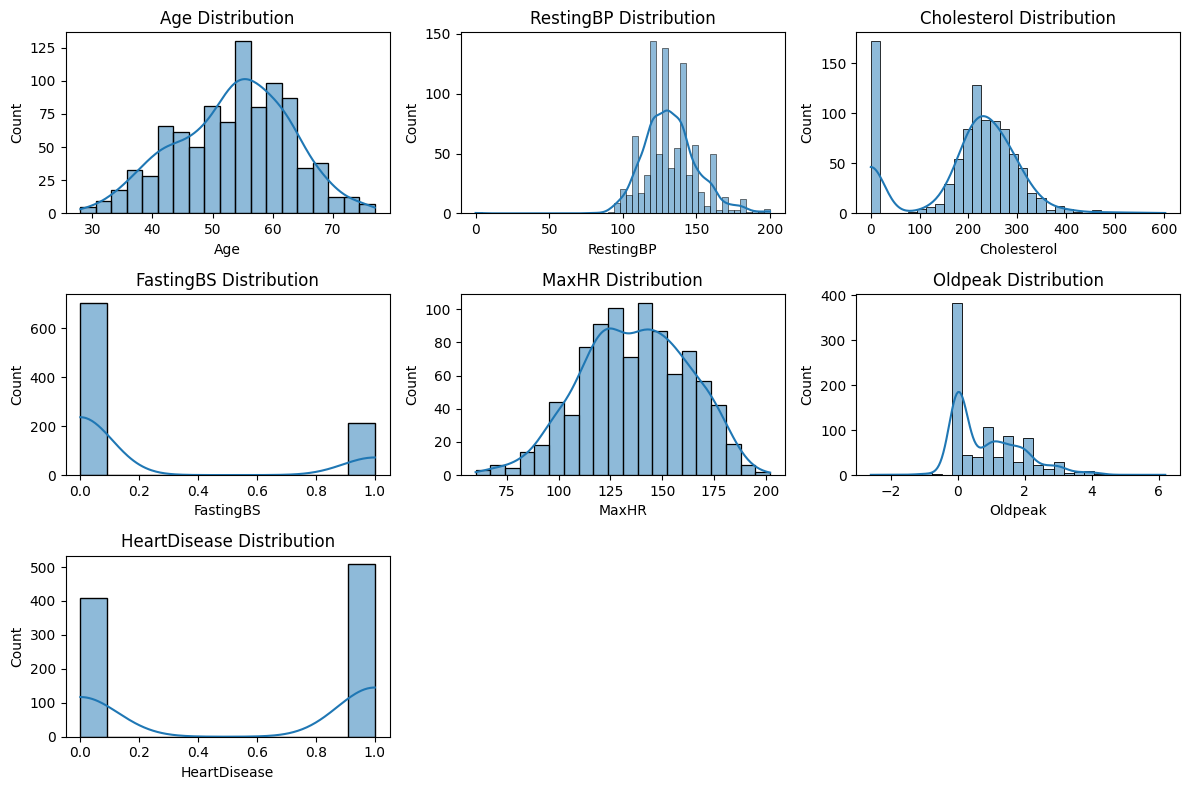

In [17]:
# Data Visualization
num_feats = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_feats.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=num_feats, x=feature, kde=True)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


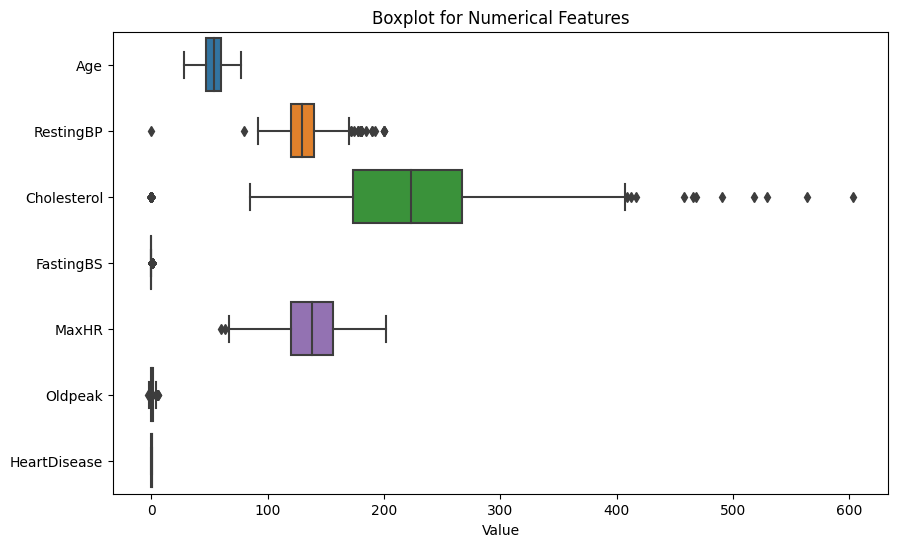

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=num_feats, orient="h")
plt.title("Boxplot for Numerical Features")
plt.xlabel("Value")
plt.show()


# Data visualization for categorical features

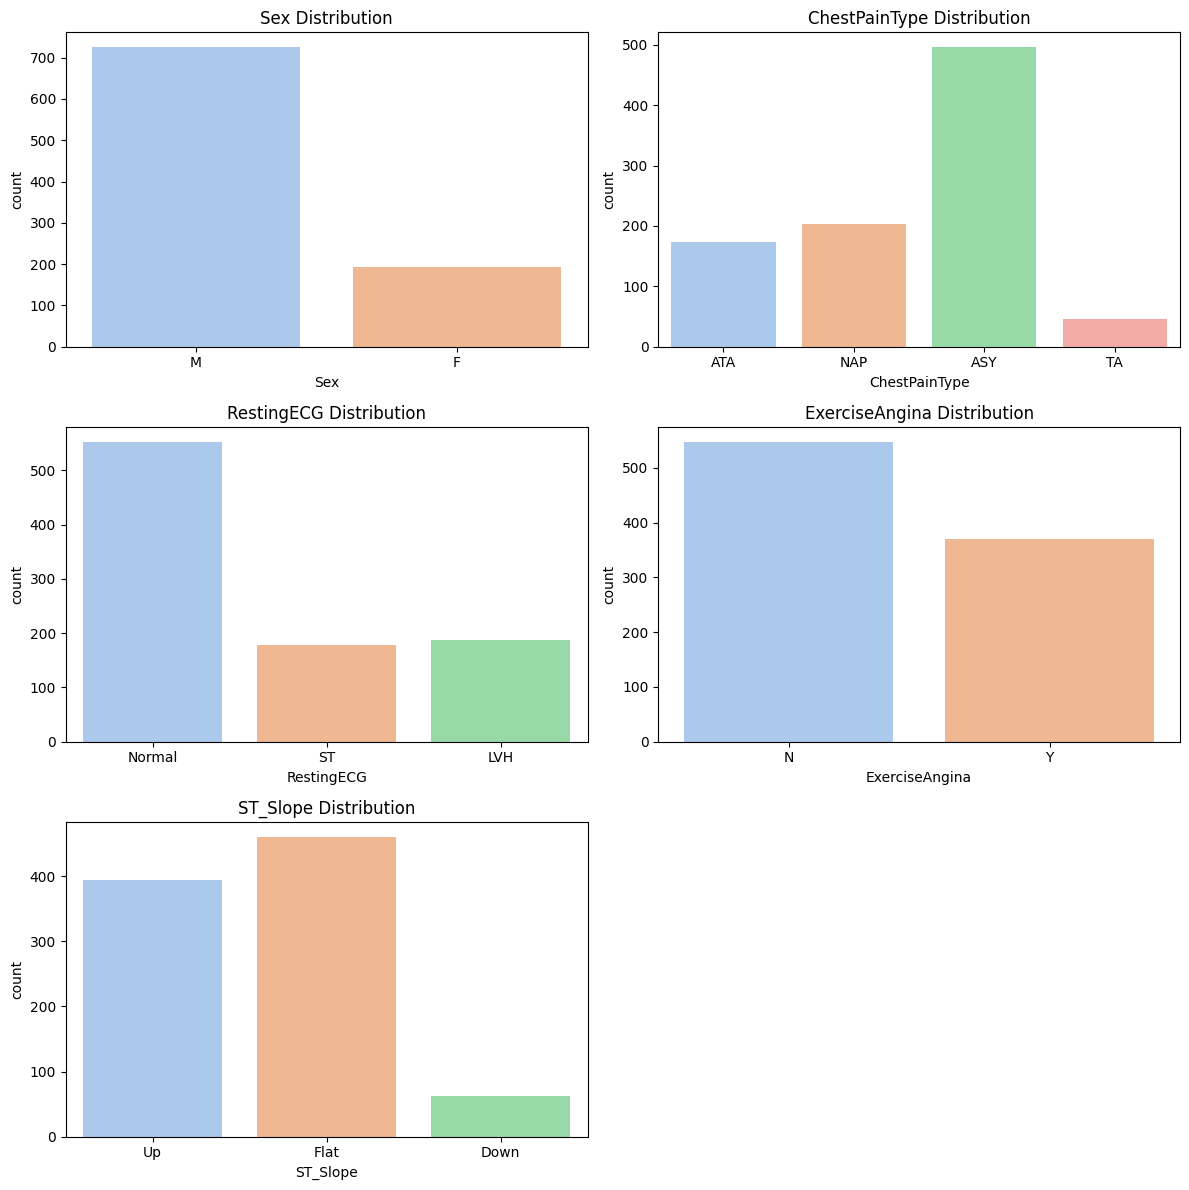

In [23]:
# Data Visualization - Categorical Features (Bar Plots)
cat_feats = df.select_dtypes(include=['object'])
plt.figure(figsize=(12, 12))
for i, feature in enumerate(cat_feats.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

# Distribution of dependent/output variable


Class Distribution:
1    508
0    410
Name: HeartDisease, dtype: int64


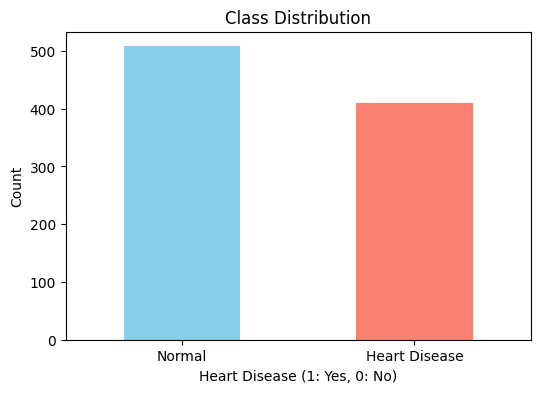

In [20]:
# Class Distribution
class_distribution = df['HeartDisease'].value_counts()
print("\nClass Distribution:")
print(class_distribution)



plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Heart Disease (1: Yes, 0: No)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal', 'Heart Disease'], rotation=0)
plt.show()

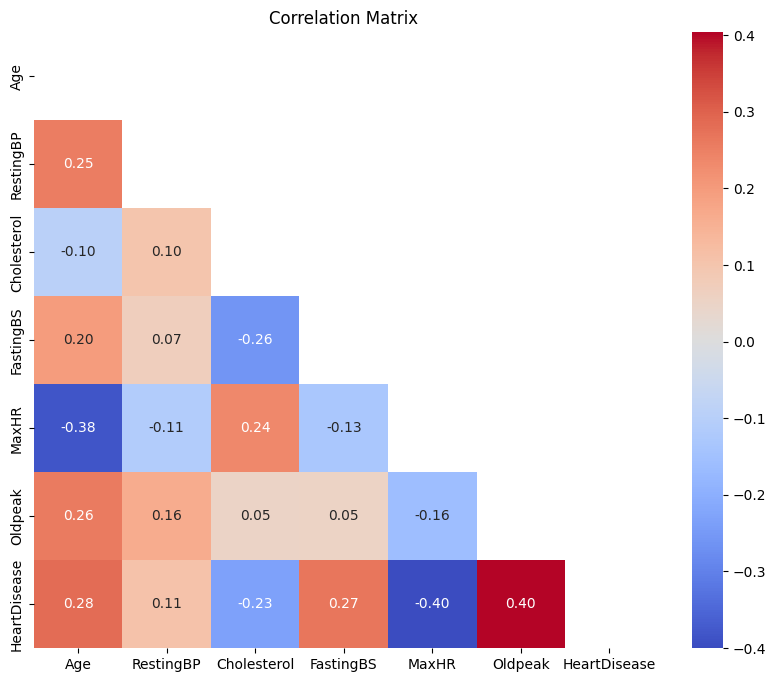

In [27]:

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Matrix")
plt.show()


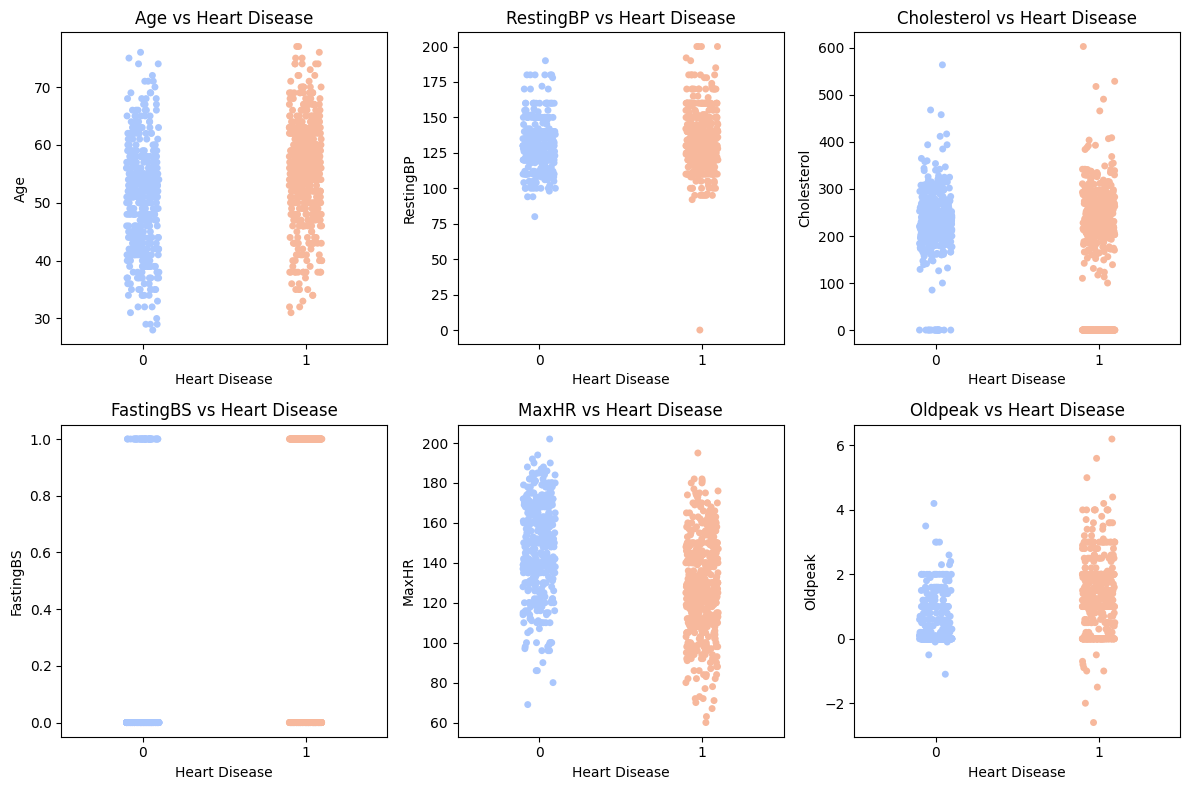

In [40]:
# Scatter plots with numerical independent variables against the dependent variable 'HeartDisease'
numerical_features = df.select_dtypes(include=[np.number])

# Number of rows and columns in the numerical features DataFrame
num_rows, num_cols = numerical_features.shape

# Number of subplots required (excluding the dependent variable 'HeartDisease')
num_plots = num_cols - 1

# Setting the size of the scatter plot grid
plt.figure(figsize=(12, 8))

# Loop through each numerical independent variable and create the scatter plot
for i, feature in enumerate(numerical_features.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.stripplot(data=df, x='HeartDisease', y=feature, jitter=True, palette='coolwarm', hue='HeartDisease')
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

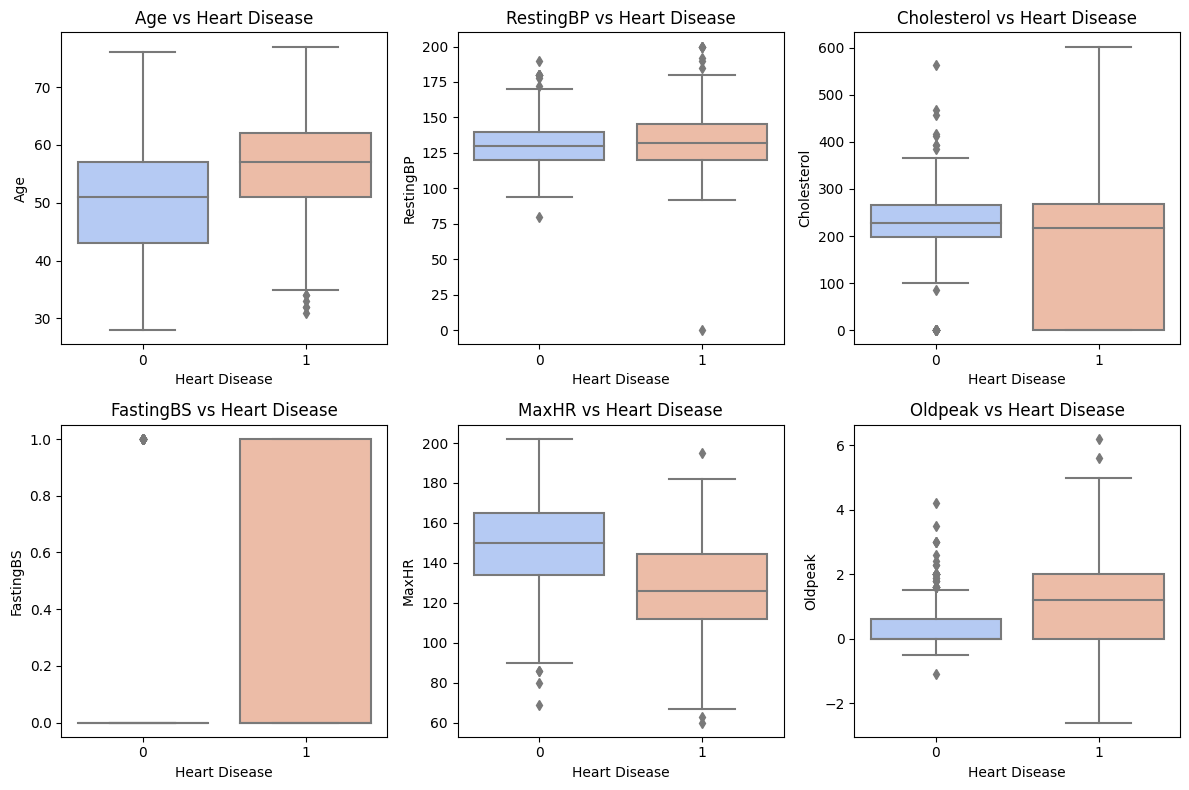

In [41]:
# Box plots with numerical independent variables against the dependent variable 'HeartDisease'
numerical_features = df.select_dtypes(include=[np.number])

# Number of rows and columns in the numerical features DataFrame
num_rows, num_cols = numerical_features.shape

# Number of subplots required (excluding the dependent variable 'HeartDisease')
num_plots = num_cols - 1

# Setting the size of the box plot grid
plt.figure(figsize=(12, 8))

# Loop through each numerical independent variable and create the box plot with hue as 'HeartDisease'
for i, feature in enumerate(numerical_features.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='HeartDisease', y=feature, palette='coolwarm')
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Check for missing values

In [43]:

# Handling Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
